In [29]:
import keras
keras.__version__

'2.1.3'

### 영화리뷰 예측 예제
- 이진 분류 문제를 다룬다. 영화의 긍정과 부정적인 평가 예측
- IMDB 데이터를 사용한다. 50000개의 리뷰 데이터

- Keras에서 제공하는 IMDB 데이터에는 이미 모든 단어를 숫자형태로 바꾼 것이다.

In [30]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

- 가장 빈도수가 높은 10000개의 단어만 사용하도록 지정할 수 있다.
- 레이블은 0이면 부정, 1이면 긍정으로 코딩되어 있다
- 아래는 첫번째 리뷰를 보였다. 여러 종류의 단어로 구성되어 있고 레이블은 1임을 알 수 있다 (단어의 종류는 10000개 이하이다)

In [31]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [32]:
train_labels[0]

1

In [33]:
max([max(sequence) for sequence in train_data])

9999

For kicks, here's how you can quickly decode one of these reviews back to English words:

- 숫자로 변환된 단어의 원래 단어를 찾는 방법은 아래와 같다

In [34]:
# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [35]:
# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [36]:
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

- 두번째 리뷰는 아래와 같다

In [37]:
' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[1]])

"? big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal ? the hair is big lots of boobs ? men wear those cut ? shirts that show off their ? sickening that men actually wore them and the music is just ? trash that plays over and over again in almost every scene there is trashy music boobs and ? taking away bodies and the gym still doesn't close for ? all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then"

### 데이터 준비
- 신경망의 입력으로 단어의 구분하는 정수를 그대로 입력하지 않는다.
- (문장을 구성하는) 단어 리스트를 텐서로 만들어야 한다. 이를 위해 두가지 방법이 있다
 - 1)먼저 문장이 같은 길이를 갖게 하기 위해서 padding을 하는 방법이 있다. 그리고 이를 정수형 텐서로 사용한다. 길이가 같은: (samples, word_indices)
 - 2)단어수 크기의 벡터를 사용한 one-hot-encode를 이용하는 방법이 있다. 입력의 길이는 같지만 매우 큰 값을 갖는다 (예: 10000개 크기)
 
- 여기서는 위의 두번째 방법을 소개하겠다. 해당 벡터값만 1로 만드는 함수를 아래에 정의했다


In [38]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

첫번째 샘플의 예이다

In [39]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

레이블에 대해서도 벡터화를 한다.

In [40]:
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

이제 신경망의 입력으로 사용할 준비가 되었다.

### 이제 신경망을 구성하겠다.
- 입력 데이터는 벡터이고 레이블은 스칼라이다. 가장 일반적인 경우이며 Dense 계층을 구성하고 relu 함수를 사용하겠다.
- Dense(16, activation='relu')
- 여기서 16은 유닛의 수이다. (뉴런의 수)
- 계수의 다음의 갯수만큼 필요하다: (input_dimension, 16)
- 출력은 다음과 같이 표현된다. output = relu(dot(W, input) + b)
- 유닛의 수가 많을수록 복잡한 모델링을 할 수 있다. 그러나 계산량이 많아지고 과적할할 수 있다.

- 신경망설계에는 계층의 수와 유닛의 수 선택문제가 있다.


- 여기서는 두 계층을 사용하겠다. 16개의 유닛과 relu 사용
- 출력단은 감성분석 결과를 예측한다. (sigmoid 함수 사용한다 0~1 사이의 분류 예측 확률을 출력)
- 네트워크 구조는 아래와 같다


![3-layer network](https://s3.amazonaws.com/book.keras.io/img/ch3/3_layer_network.png)

- Keras를 이용한 구현 코드는 아래와 같다.
- 앞의 MNIST 예와 유사하다.

In [41]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

- 손실함수를 택해야 한다. 여기서는 이진 분류 문제이므로 binary_crossentropy를 사용하겠다.
- 여러가지 손실함수가 있는데, 이진 분류에서는 이것이 널리 사용된다(출력이 확률인 경우). 수치 예측시에는 RMSE가 널리 사용된다.
- crossentropy 란 실제 확률 분포와 예측한 확률의 차이(오차)를 측정하는 한 방법이다.
- 최적화 알고리즘으로 rmsprop를 사용하겠다.
- 성능 측정으로는 정확도를 측정한다.

In [42]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

- 물론 다른 종류의 손실함수, 최적화기, 성능지표를 선택할 수 있다.

In [43]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

- 아래와 같이 인자를 정의할 수도 있다.

In [44]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

- 훈련과정에서 얼마나 성능이 좋은지 확인하기 위해서 검증용 데이터 셋을 사용할 수 있다.
- 여기는 10000개의 데이터를 검증용으로 사용하겠다.

In [45]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

- 주어진 훈련 데이터를 총 20회 반복해서 사용하여 훈련을 하겠다.
- 한번에 512개씩 훈련에 사용한다 (mini batch 크기)
- 테스트 데이터가 아니라 검증용 데이터를 사용하여 성능을 측정한다

In [46]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 48us/step - loss: 0.5084 - binary_accuracy: 0.7813 - val_loss: 0.3797 - val_binary_accuracy: 0.8684
Epoch 2/20
15000/15000 [==============================] - 1s 42us/step - loss: 0.30

- 위 코드의 실행결과를 History 타입의 변수에 저장했다. 변화가 있을 때마다 중간 데이터를 딕셔너리 구조체에 저장한다

In [49]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

- 네가지의 입력이 저장된다. 이 데이터를 그래프로 그려보겠다. 손실값과 정밀도를 각각 그려보겠다.

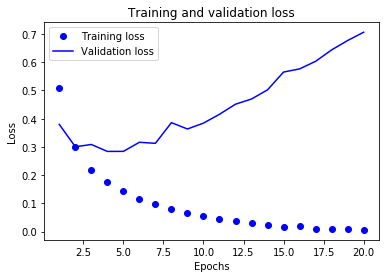

In [57]:
import matplotlib.pyplot as plt

# acc = history.history['binary_accuracy']
# val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

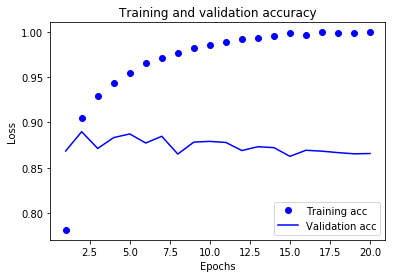

In [58]:
plt.clf()   # clear figure
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

- 점선은 훈련데이터의 결과이고 실선은 검증데이터를 모델에 입력한 결과이다.
- 이포크가 진행되면서 훈련데이터의 성능은 좋아진다.
- 그러나 검증 데이터에 대해서는 계속 성능이 좋아지는 것은 아니다. (주어진 훈련 데이터에 모델이) 과적합되면 오히려 성능이 떨어진다
- 과적한은 일반화하지 못한 것을 말한다.
- 이포크를 4회만 실행해보겠다. 입력은 10000개의 벡터이다.

In [59]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 1s 30us/step - loss: 0.4749 - acc: 0.8217

In [60]:
results

[0.3244216357135773, 0.87308]

- 간단한 모델로 88%의 정확도를 얻었다. 참고로 최상의 기술로는 95%의 성능을 얻는다.

- 테스트 데이터에 대해서 성능을 평가해보겠다.
- precict 메소드를 사용한다

In [61]:
model.predict(x_test)

array([[0.1387876 ],
       [0.99970156],
       [0.29408842],
       ...,
       [0.07110815],
       [0.04288397],
       [0.4755973 ]], dtype=float32)

- 긍정 (또는) 부정에 대한 확신도는 1이나 0에 가까우면 높은 편이나 0.5 근처이면 낮은 것이다.

### 추가로 할 일
- 계층을 2개 사용하였는데, 1, 3, 5 등 달리 실행해본다
- 유닛의 수를 16이 아닌 32, 64 등을 사용해 본다
- 손실함수로 MSE 등 다른 것을 사용해본다
- relu가 아닌 다른 활성화 함수를 사용해본다 tanh 등

### 결론
- 신경망에 데이터를 입력하기 전에 전처리가 필요하다
- 감성분석의 예를 보였는데  Dense 네트워크로도 잘 동작한다
- 출력단에 유닛을 하나 사용하는 예를 보였다 (이진 분류이므로). 보통 entropy를 성능측정함수로 사용한다.
- 최적화 알고리즘은 rmsprop이 널리 사용된다.
- 신경망은 과적합되기 쉽다. 이를 잘 모니터링 해야 한다.